In [191]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
url='https://drive.google.com/file/d/1VfCaU5vFVWsSYrvKQF2x9iS6I7KoWEVH/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

In [192]:
df.shape

(11275, 5)

In [195]:
df.columns

Index(['ss_username', 'cf_username', 'cf_rating', 'cc_username', 'cc_rating'], dtype='object')

In [197]:
y=df['cf_rating']
x=df['cc_rating']
print('Values cc :',len(x),' , Values cf :',len(y))
x=x.dropna()
y=y.dropna()
print("Removing nan cc :",len(x)," , Removing nan cf :",len(y))

Values cc : 11275  , Values cf : 11275
Removing nan cc : 10280  , Removing nan cf : 7437


In [199]:
df1=df.dropna()
y=df1['cf_rating']
x=df1['cc_rating']
print(df1.shape)

(6442, 5)


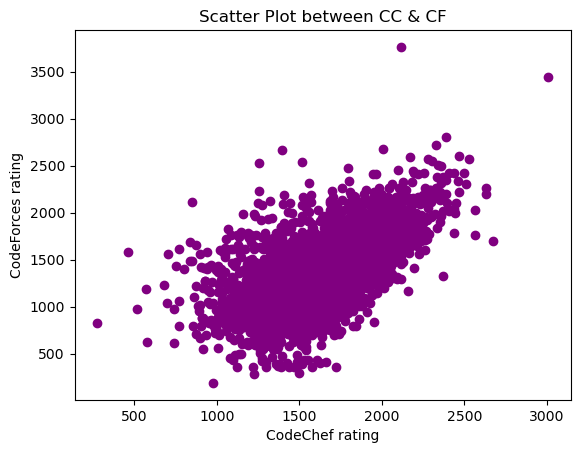

In [201]:
#6442 entries have both CC and CF ratings available 
plt.scatter(x,y,color='purple')
plt.title('Scatter Plot between CC & CF')
plt.xlabel('CodeChef rating')
plt.ylabel('CodeForces rating')
plt.show()

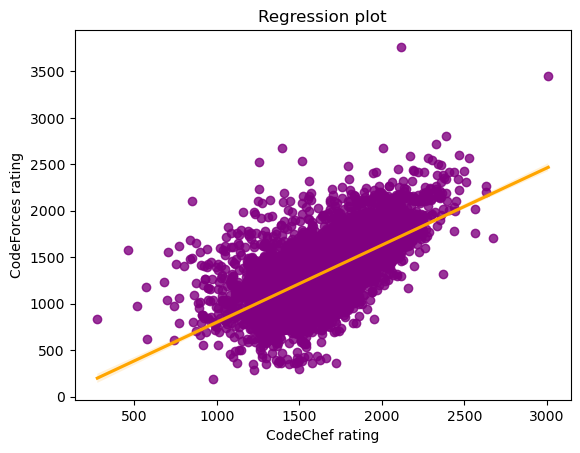

In [203]:
sns.regplot(x=x,y=y,scatter_kws={"color": "purple"}, line_kws={"color": "orange"})
plt.title('Regression plot')
plt.xlabel('CodeChef rating')
plt.ylabel('CodeForces rating')
plt.show()

b_0 = -32.62926507315615  ,  b_1 = 0.8315620555789324


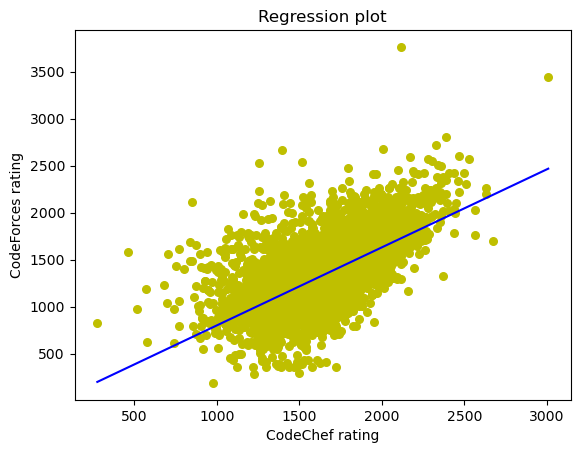

In [205]:
def calc_coef(x, y):
    n = np.size(x)
    mx = np.mean(x)
    my = np.mean(y)
  
    SS_xy = np.sum(y*x) - n*my*mx
    SS_xx = np.sum(x*x) - n*mx*mx
  
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = my - b_1*mx
  
    return (b_0, b_1)
  
def plot_regression_line(x, y, b):
    plt.scatter(x, y, color = "y", s = 30)
  
    # plotting regression line with predicted response vector
    y_pred = b[0] + b[1]*x
    plt.plot(x, y_pred, color = "blue")
    plt.title('Regression plot')
    plt.xlabel('CodeChef rating')
    plt.ylabel('CodeForces rating')
    plt.show()
  
b = calc_coef(x, y)
print("b_0 =",b[0]," ,  b_1 =",b[1])

plot_regression_line(x, y, b)


In [207]:
#b_0 = -32.62926507315615  ,  b_1 = 0.8315620555789324

def predict(codechef_rating):
    codeforces_rating=(codechef_rating*b_1)+b_0
    return codeforces_rating
    
print('CodeChef\t    Codeforces')
for i in range(500,2100,50):
    print('  ', i,' \t    ', round(predict(i),2))

CodeChef	    Codeforces
   500  	     383.15
   550  	     424.73
   600  	     466.31
   650  	     507.89
   700  	     549.46
   750  	     591.04
   800  	     632.62
   850  	     674.2
   900  	     715.78
   950  	     757.35
   1000  	     798.93
   1050  	     840.51
   1100  	     882.09
   1150  	     923.67
   1200  	     965.25
   1250  	     1006.82
   1300  	     1048.4
   1350  	     1089.98
   1400  	     1131.56
   1450  	     1173.14
   1500  	     1214.71
   1550  	     1256.29
   1600  	     1297.87
   1650  	     1339.45
   1700  	     1381.03
   1750  	     1422.6
   1800  	     1464.18
   1850  	     1505.76
   1900  	     1547.34
   1950  	     1588.92
   2000  	     1630.49
   2050  	     1672.07
